This is the Import statements required for the data

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
pd.Series.__unicode__ = pd.Series.to_string
import numpy as np
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
import plotting

In [3]:
import copy

In [4]:
import getDataFrameExtended as getdata

In [5]:
import utils

In [6]:
df=pd.read_csv("./census2011.csv")

In [7]:
df.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,4
1,7394745,E12000001,H,5,1,1,4,1,2,1,1,1,2,1,8,6,4,3
2,7395066,E12000001,H,3,1,2,4,1,2,1,1,1,1,1,6,11,3,4
3,7395329,E12000001,H,3,1,2,2,1,2,1,2,1,2,1,7,7,3,2
4,7394712,E12000001,H,3,1,1,5,4,2,1,1,1,2,1,1,4,3,2


In [8]:
newdf = copy.deepcopy(df)
utils.translate(newdf)

In [9]:
newdf.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,Approximated Social Grade
0,7394816,North East,Not Resident,Married/Civil Partnership,Usual Resident,Female,55 to 64,Married/Civil Partnership,False,UK,Good Health,White,Christian,Retired,"Process, Plant and Machine Operatives",Mining and Quarrying,No Code Required,DE
1,7394745,North East,Not Resident,Lone Parent Family (Female),Usual Resident,Male,35 to 44,Single (Never Married/Civil Partnership),False,UK,Very Good Health,White,Christian,Employee,"Process, Plant and Machine Operatives",Transport and Storage,49 or More Hours,C2
2,7395066,North East,Not Resident,Cohabiting Couple Family,Usual Resident,Female,35 to 44,Single (Never Married/Civil Partnership),False,UK,Very Good Health,White,No Religion,Employee,"Caring, Leisure and Other Service",Human Health and Social Work,31 to 48 Hours,DE
3,7395329,North East,Not Resident,Cohabiting Couple Family,Usual Resident,Female,16 to 24,Single (Never Married/Civil Partnership),False,UK,Good Health,White,Christian,Employee,Sales and Customer Service,Financial and Insurance,31 to 48 Hours,C1
4,7394712,North East,Not Resident,Cohabiting Couple Family,Usual Resident,Male,45 to 54,Divorced or Formerly in a Civil Partnership,False,UK,Very Good Health,White,Christian,Employee,"Managers, Directors and Senior Officials",Wholesale and Retail Trade,31 to 48 Hours,C1


Basic Requirement Number 2

In [ ]:
#Basic Requirement 2.1
print("The number of records is " + str(len(df)))

In [ ]:
#Basic Requirement 2.2
print("All Data Types:\n" + str(df.dtypes))

In [ ]:
#Basic Requirement 2.3
for column in newdf:
    if (column != "Person ID"):
        print(str(column)+ " Counts\n" +str(newdf[column].value_counts()) + "\n")

Plotting Graph Basic Requirements 3

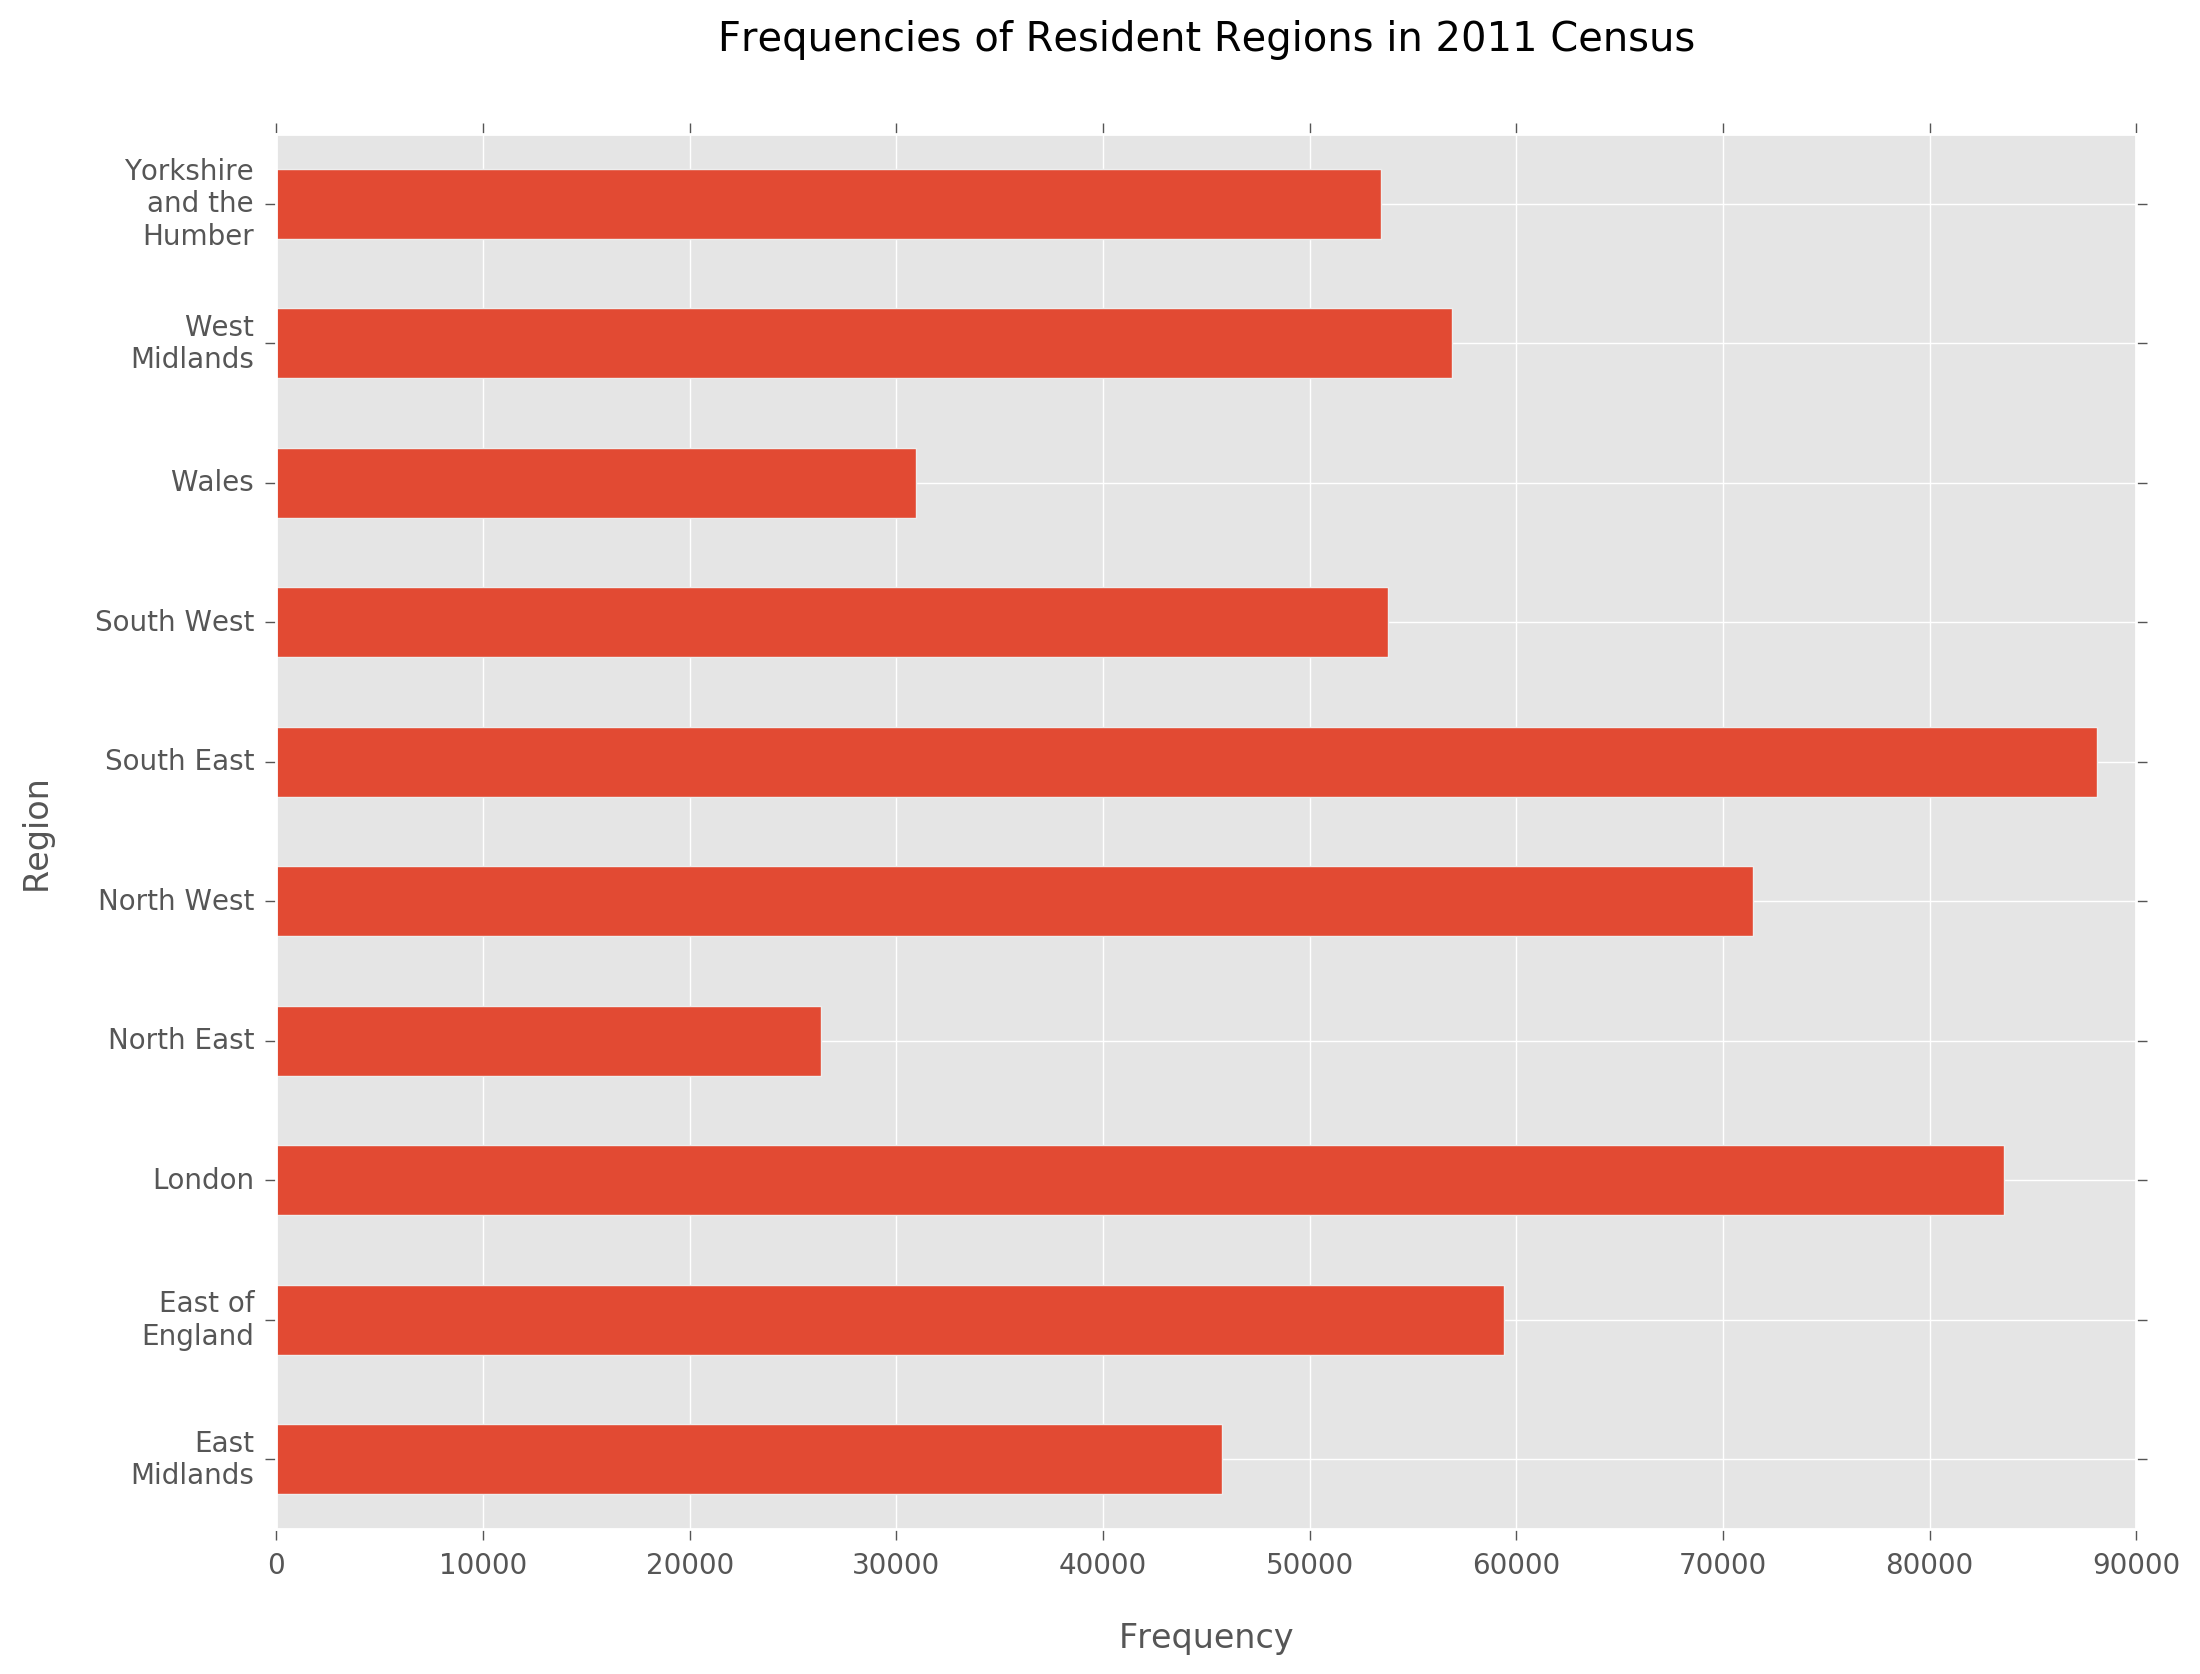

In [11]:
# Number of Records per region
plt.figure(figsize=(12, 9))
plotting.plot_bar_group_count(
    newdf,
    'Region',
    'Frequencies of Resident Regions in 2011 Census',
)

In [ ]:
# Number of records per occupation
plt.figure(figsize=(15, 9))
plotting.plot_bar_group_count(
    newdf,
    'Occupation',
    'Frequencies of Resident Occupations in 2011 Census',
)

In [ ]:
#Pie Chart for Distrubition of the sample by age
plt.figure(figsize=(12, 9))
plotting.plot_pie_group_count(
    newdf,
    'Age',
    'Proportions of Resident Ages in 2011 Census',
)

In [ ]:
#Pie Chart for Distrubition of the sample by economic activity
plt.figure(figsize=(12, 9))
plotting.plot_pie_group_count(
    newdf,
    'Economic Activity',
    'Proportions of Resident Economic Activity in 2011 Census',
)

Easy Extension 1

In [ ]:
#Easy Extension 1 part 1 Using crosstab
dfeasy11 = pd.crosstab(newdf['Region'], newdf['Industry'])
dfeasy11

In [ ]:
#Easy Extension 1 part 2 using crosstab
dfeasy12 = pd.crosstab(newdf['Occupation'], newdf['Approximated Social Grade'])
dfeasy12

In [ ]:
#Easy 1 part 1 using GroupBy
easy11 = newdf.groupby(['Region','Industry'])['Person ID'].count()
easy11 = pd.Series.to_frame(easy11)
easy11.columns.values[0] = 'Counts'
easy11

In [ ]:
#Easy 1 part 2 using GroupBy
easy12 = newdf.groupby(['Occupation','Approximated Social Grade'])['Person ID'].count()
easy12 = pd.Series.to_frame(easy12)
easy12.columns.values[0] = 'Counts'
easy12

Easy Extension 2 Parts 1 and 2 -Part 3 was filtered in the Dataset to begin with

In [ ]:
#Filtering the Dataset to be economic code from 1-4
ea = df[df["Economic Activity"].isin(range(1, 5))]
ea = copy.deepcopy(ea)
utils.translate(ea)

In [ ]:
# Easy 2 Part 1 using CrossTab
easy21 = pd.crosstab(index = (ea)['Region'], columns = 'count')
easy21 = easy21.sort_values(['count'],ascending = 0)
easy21

In [ ]:
EconomicallyActivePeopleGraphRegion = easy21.plot(kind = "barh",legend = False,title = "Count of Economically Active People By Region",figsize=(7,4))
EconomicallyActivePeopleGraphRegion.set_xlabel("Region")
EconomicallyActivePeopleGraphRegion.set_ylabel("Count")
EconomicallyActivePeopleGraphRegion

In [ ]:
# Easy 2 Part 2 using CrossTab
easy22 = pd.crosstab(index = (ea)['Age'], columns = 'count')
easy22 = easy22.sort_values(['count'],ascending = 0)
easy22

In [ ]:
EconomicallyActivePeopleGraphAge = easy22.plot(kind = "barh",legend = False,title = "Count of Economically Active People By Region",figsize=(7,4))
EconomicallyActivePeopleGraphAge.set_xlabel("Age")
EconomicallyActivePeopleGraphAge.set_ylabel("Count")
EconomicallyActivePeopleGraphAge

<IPython.core.display.Javascript object>


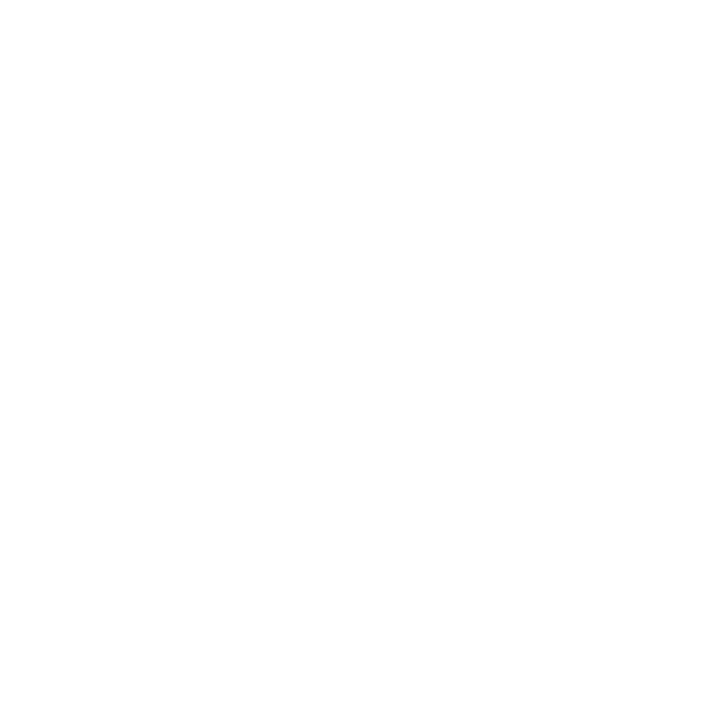

<IPython.core.display.Javascript object>


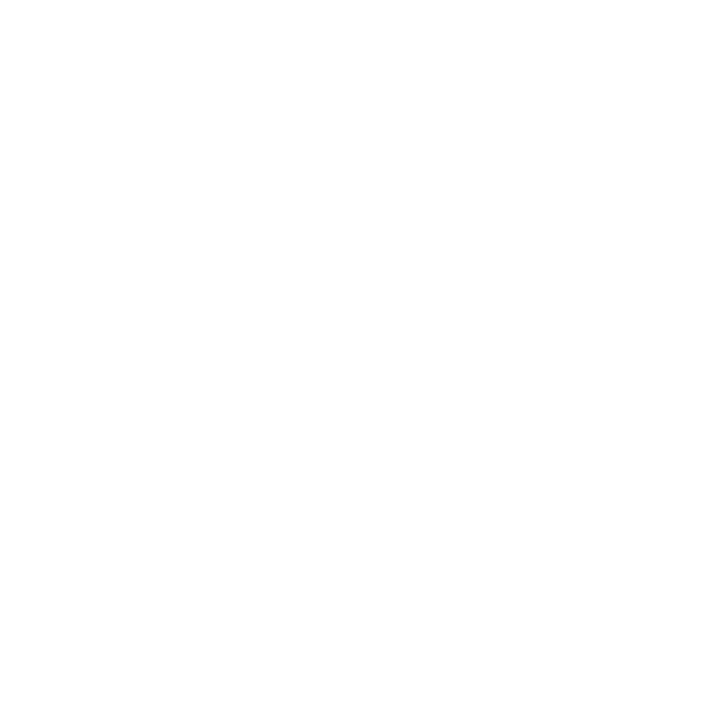

In [12]:
%matplotlib notebook
plt.figure(figsize=(10, 10))
plotting.plot_3d_table_count(
        newdf,
        'Region',
        'Industry',
        'Frequencies Residents by Region and Industry in 2011 Census',
        'Region',
        'Industry',
    )

ipywidgets 

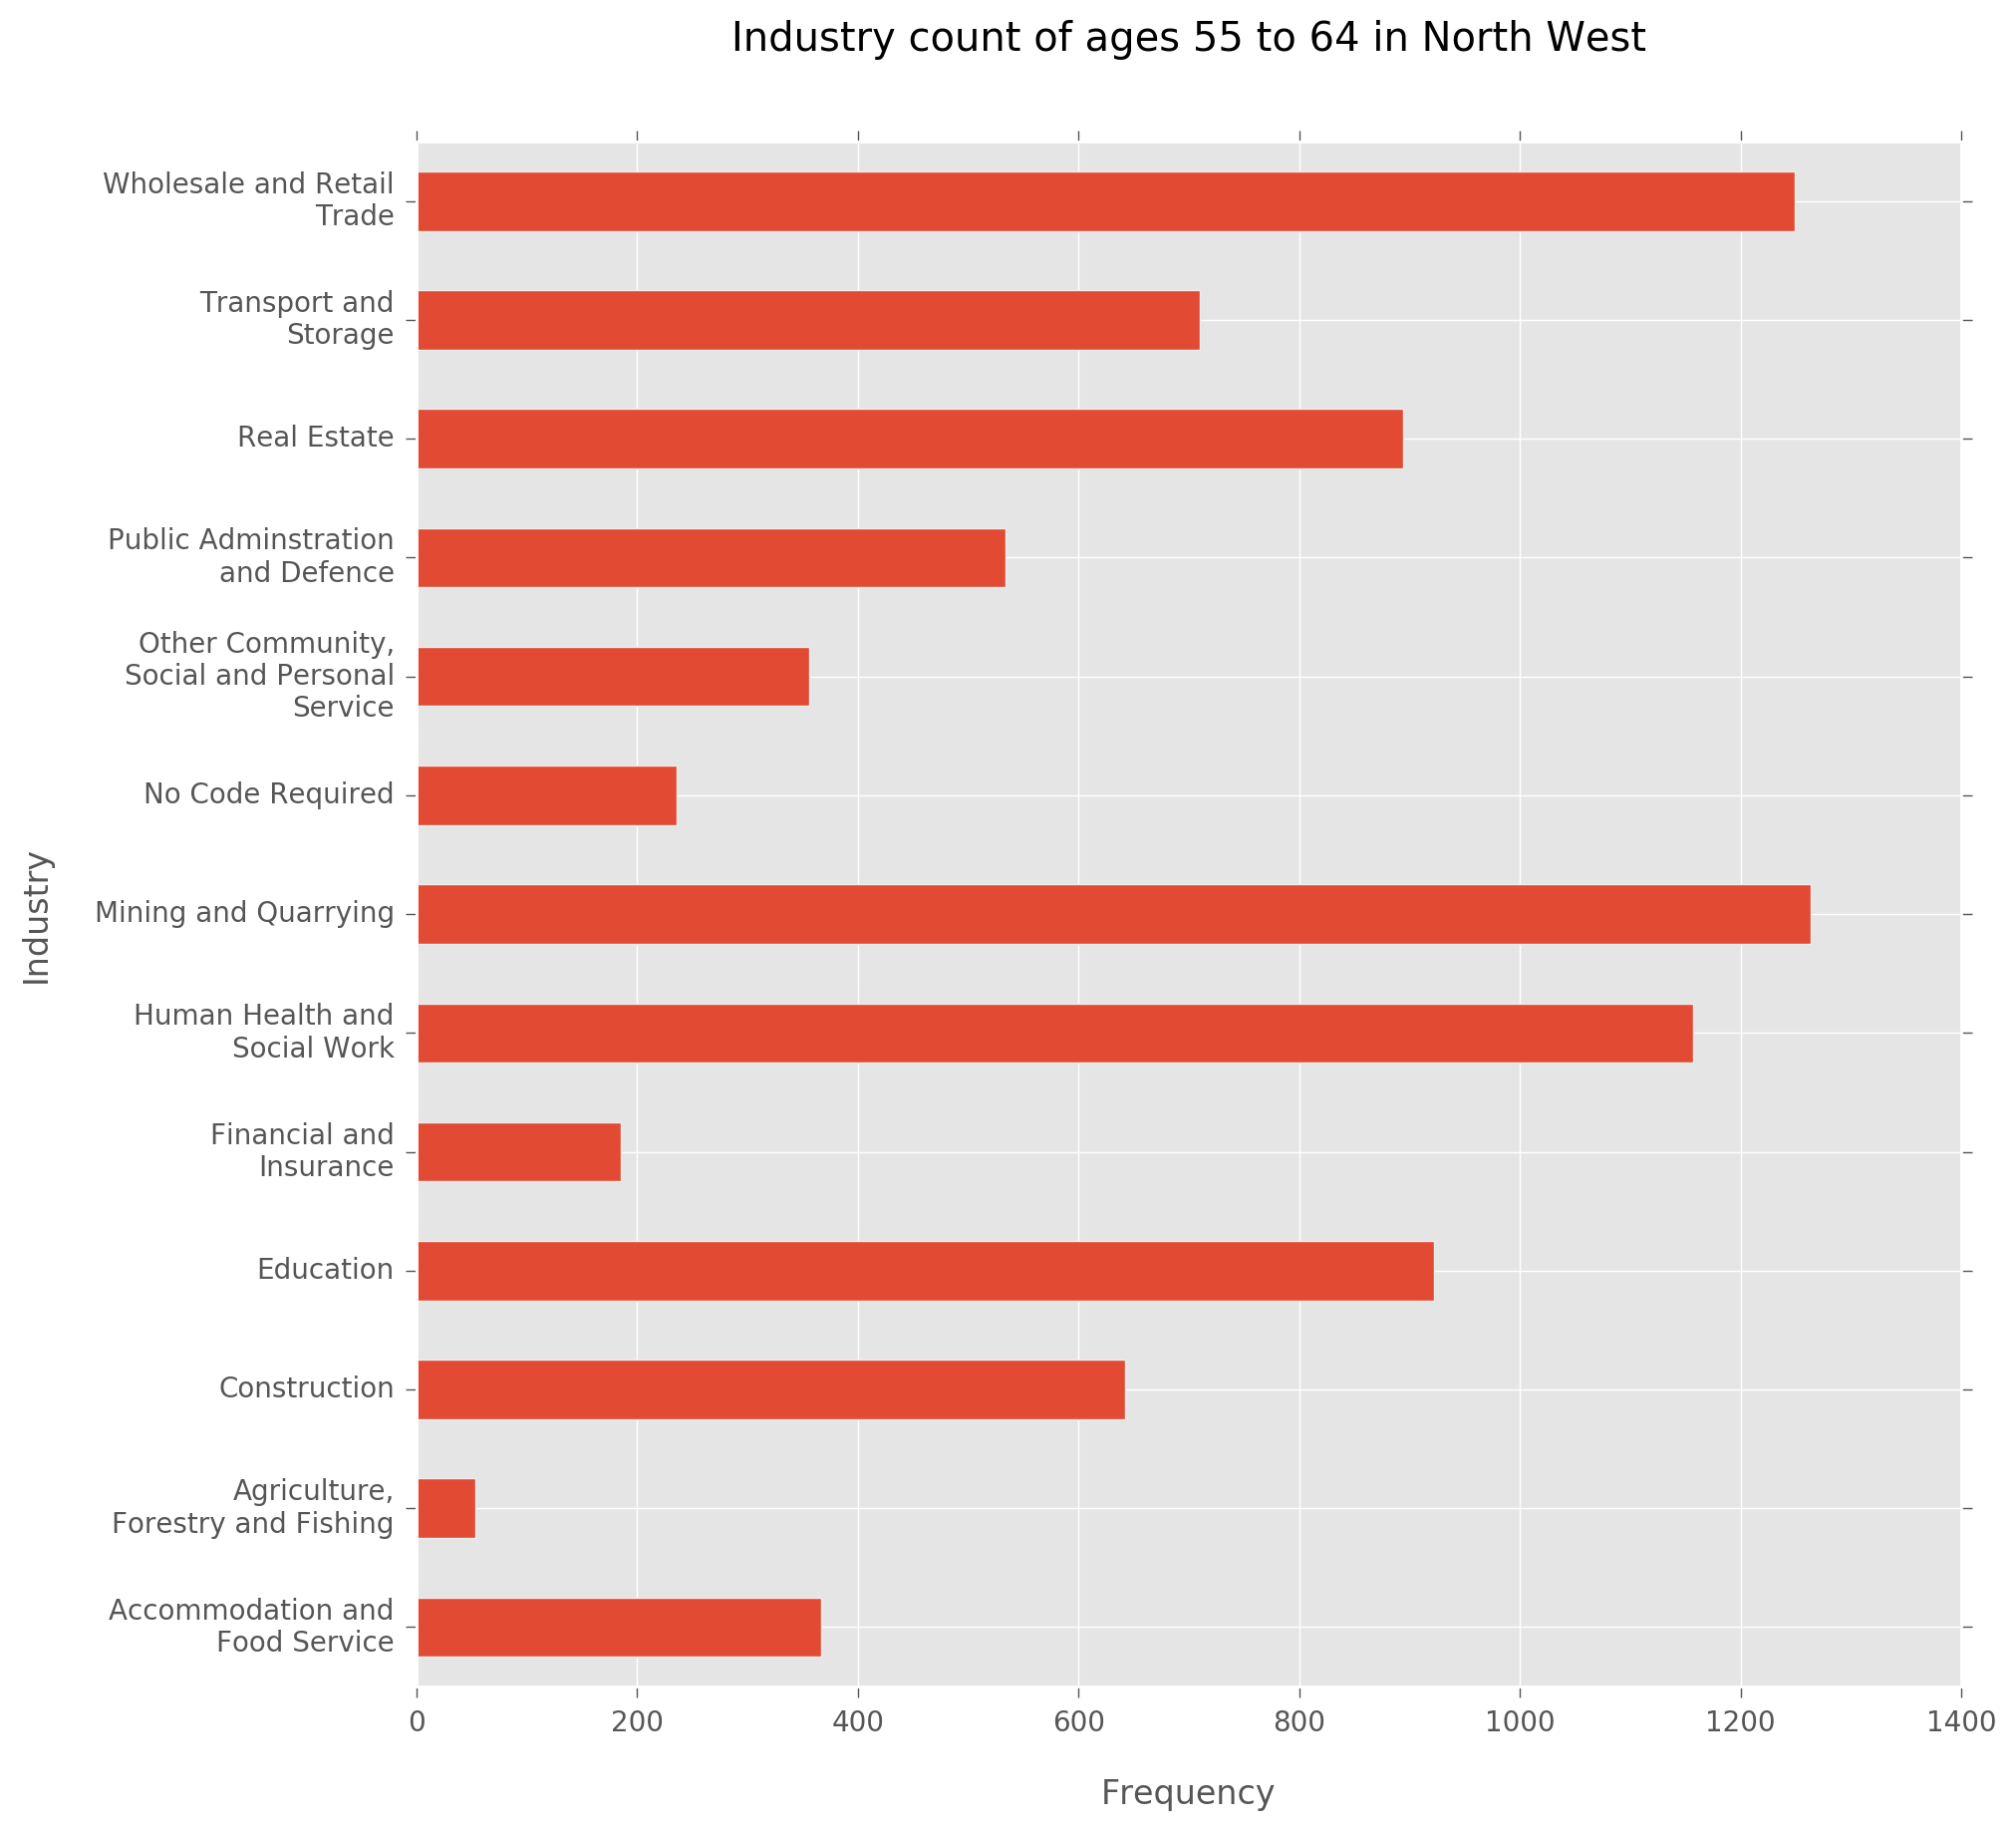

In [14]:
%matplotlib inline
def industryfunc(Region,Age):
    temp = newdf[(newdf['Region'] == Region) & (newdf['Age'] == Age)]
    name = "Industry count of ages " + Age +" in " + Region
    plt.figure(figsize=(10, 10))
    plotting.plot_bar_group_count(
        temp, 
        'Industry', 
        name,
        wrap_chars = 20
    )
regionvalues = newdf.Region.unique()
regionvalues = regionvalues.tolist()

agevalues = newdf.Age.unique()
agevalues = agevalues.tolist()

interact(industryfunc, Region=regionvalues,Age=(agevalues))

Extension analysis of the dataset

In [ ]:
IPLData = getdata.getData()

In [ ]:
IPLData

In [ ]:
#Number of each type of Runs by ball for each venue
numGameAtVenue = IPLData.drop_duplicates('Match Number')['Venue'].value_counts()
numGameAtVenue
def getNoGames(row):
    venueCount = numGameAtVenue.index == row.name
    venueCount = numGameAtVenue[list(venueCount).index(True)]
    temp = (row / venueCount)
    return temp.astype(int)

Total_Runs = IPLData['Runs'] + IPLData['Extras']
Total_Runs = Total_Runs.rename('No. Of Runs on Ball')
Total_Runs = pd.crosstab(IPLData['Venue'],Total_Runs)
Total_Runs = Total_Runs.apply(getNoGames,axis =1)
del Total_Runs[7]
Total_Runs

In [ ]:
def FrequencyOfRunsStadiumFunc(Balls_Per_Venue):
    stadia = Total_Runs.loc[Balls_Per_Venue]
    stadia = pd.DataFrame(stadia)
    BallStadiumGraph = stadia.plot(kind ="Barh",legend = False,figsize=(8,5),title = "Averge number of times all runs were made per game \nat "+ Balls_Per_Venue)
    BallStadiumGraph.set_xlabel("Average Number of Occurrences per Game")
    BallStadiumGraph.set_ylabel("Runs")
    
stadiaRuns = list(Total_Runs.index)
interact(FrequencyOfRunsStadiumFunc, Balls_Per_Venue=stadiaRuns)

In [ ]:
def stadiumFunc(Runs_Per_Ball_Per_Game):
    stadiumsBall = Total_Runs[int(Runs_Per_Ball_Per_Game)]
    stadiumsBallGraph = stadiumsBall.plot(kind ="Barh",figsize=(10,7),title = "Averge number of times " + Runs_Per_Ball_Per_Game + " runs were made per game in every stadium")
    stadiumsBallGraph.set_xlabel("Average Occurrence per Game")
    stadiumsBallGraph.set_ylabel("Stadium")
    
stadiaRuns = list(Total_Runs.columns.values)
interact(stadiumFunc, Runs_Per_Ball_Per_Game=stadiaRuns)

In [ ]:
#Number of each type of Runs by ball for each ball
totalRuns = IPLData['Runs'] + IPLData['Extras']
totalRuns = totalRuns.rename('No. Of Runs on Ball')
NumberRunsByBall = pd.crosstab(IPLData['Ball No.'],totalRuns)
NumberRunsByBall

In [ ]:
def OverNum(Over_Number):
    OverRuns = NumberRunsByBall[(NumberRunsByBall.index < Over_Number) & (NumberRunsByBall.index>(Over_Number-1))]
    del OverRuns[7]
    OverRunsGraph = OverRuns.plot(kind ="Barh",figsize=(12,12),title = "Frequency of Run Type for each Ball in Over Number "+ str(Over_Number))
    OverRunsGraph.set_xlabel("Average Occurrence per Game")
    OverRunsGraph.set_ylabel("Balls in Over "+ str(Over_Number))
    OverRunsGraph.legend(["Dot Ball","One Run","Two Runs","Three Runs", "Four Runs", "Five Runs","Six Runs"],loc='center left', bbox_to_anchor=(1.0, 0.5))
    OverRunsGraph
interact(OverNum, Over_Number=(1,20))

In [ ]:
# Runs by innings
InningsRuns = IPLData.groupby(['Innings'])['Runs'].sum()
InningsRuns = pd.Series.to_frame(InningsRuns)
InningsRuns

In [ ]:
InningRunsGraph = InningsRuns.plot(kind = "Barh",legend = False, figsize=(8,3),title = "Total Runs per Innings")
InningRunsGraph.set_xlabel("Innings Number")
InningRunsGraph.set_ylabel("Runs")
InningRunsGraph

In [ ]:
# Extras by innings
InningsExtras = IPLData.groupby(['Innings'])['Extras'].sum()
InningsExtras = pd.Series.to_frame(InningsExtras)
InningsExtras

In [ ]:
InningExtrasGraph = InningsExtras.plot(kind = "Barh",legend = False, figsize=(8,3),title = "Total Extras per Innings")
InningExtrasGraph.set_xlabel("Innings Number")
InningExtrasGraph.set_ylabel("Extras")
InningExtrasGraph

In [ ]:
# Type of Runs by Teams
teamRuns = IPLData['Runs'] + IPLData['Extras']
teamRuns = teamRuns.rename('Count of Run Type')
teamsRunTypes = pd.crosstab(IPLData['Batting Team'], teamRuns)
teamsRunTypes

In [ ]:
def frequencyRunTypeFunc(TeamName):
    teamRunsFrequency = teamsRunTypes.loc[TeamName]
    teamRunsFrequency = pd.DataFrame(teamRunsFrequency)
    TeamRunsFrequencyGraph = teamRunsFrequency.plot(kind ="Barh",legend = False,figsize=(8,5),title = "Averge number of times all runs were made by \n "+ TeamName)
    TeamRunsFrequencyGraph.set_xlabel("Total Occurrences")
    TeamRunsFrequencyGraph.set_ylabel("Runs")
    
teamNames = list(teamsRunTypes.index)
interact(frequencyRunTypeFunc, TeamName=teamNames)

In [ ]:
def runTypeFunc(RunType):
    teamRunTypes = teamsRunTypes[int(RunType)]
    teamRunTypesGraph = teamRunTypes.plot(kind ="Barh",figsize=(12,7),title = "Number of times " + RunType + " was scored by each team")
    teamRunTypesGraph.set_xlabel("Total Occurrences")
    teamRunTypesGraph.set_ylabel("Team")
    
TeamRunsTypesList = list(teamsRunTypes.columns.values)
interact(runTypeFunc, RunType=TeamRunsTypesList)

In [ ]:
# Top Wicket Takers in the IPL
def getBowlingTeam(row):
    record = allBowlers[allBowlers['Bowler'] == row.name]
    temp = record['Bowling Team']
    temp = temp.values 
    return temp
allBowlers = IPLData.drop_duplicates(subset = 'Bowler')
bowlerswickets = IPLData[((IPLData['How Out'] != '-') & (IPLData['How Out'] != 'run out'))]
allwickets = bowlerswickets['Bowler'].value_counts()
allwickets = pd.Series.to_frame(allwickets)
allwickets.insert(1,'Team',None)
allwickets = allwickets.sort_values('Bowler',ascending = 0)
allwickets['Team'] = allwickets.apply(getBowlingTeam, axis=1)
allwickets

In [ ]:
def bowlingfunc(Team):
    teamNameWickets = bowlerswickets[bowlerswickets['Bowling Team'] == Team]
    name = "Total Wickets in " + Team
    plt.figure(figsize=(10, 7))
    plotting.plot_bar_group_count(
        teamNameWickets, 
        'Bowler', 
        name,
        wrap_chars = 20
    )
wickets = allwickets.Team.unique()
wickets = wickets.tolist()

interact(bowlingfunc, Team=wickets)

In [ ]:
# Top Run Scorers
def getBattingTeam(row):
    record = allBatsmen[allBatsmen['Striker'] == row.name]
    temp = record['Batting Team']
    temp = temp.values 
    return temp

allBatsmen = IPLData.drop_duplicates(subset = 'Striker')
allruns = IPLData.groupby(['Striker'])['Runs'].sum()
allruns = pd.Series.to_frame(allruns)
allruns = allruns
allruns.insert(1,'Team',None)
allruns = allruns.sort_values('Runs',ascending =0)
allruns['Team'] = allruns.apply(getBattingTeam, axis=1)
allruns

In [ ]:
def industryfunc(Team):
    teamNameRuns = allruns[allruns['Team'] == Team]
    temp = teamNameRuns.plot(kind = "Barh",figsize=(7,7),sort_columns = True,title =("Highest Run Scorers for " + Team),legend = False)
    temp.set_xlabel("Number of Runs Scored")
    temp.set_ylabel("Bastmen Name")
    temp
    
runs = allruns.Team.unique()
runs = runs.tolist()

interact(industryfunc, Team=runs)

In [ ]:
# Total Team Runs
teamruns = IPLData.groupby(['Batting Team'])['Runs'].sum()
teamruns = pd.Series.to_frame(teamruns)
teamruns = teamruns.sort_values('Runs',ascending = 0)
teamruns

In [ ]:
teamRunsGraph = teamruns.plot(kind = "barh",legend = False,title = "Total Number of Runs by Team",figsize=(7,4))
teamRunsGraph.set_xlabel("Number of Runs")
teamRunsGraph.set_ylabel("Team")
teamRunsGraph

In [ ]:
# Total Team Extras
teamextras = IPLData.groupby(['Batting Team'])['Extras'].sum()
teamextras = pd.Series.to_frame(teamextras)
teamextras = teamextras.sort_values('Extras',ascending = 0)
teamextras

In [ ]:
teamExtrasGraph = teamextras.plot(kind = "barh",legend = False,title = "Total Number of Extras by Team",figsize=(7,4))
teamExtrasGraph.set_xlabel("Number of Extras")
teamExtrasGraph.set_ylabel("Team")
teamExtrasGraph

In [ ]:
# Total Team Wickets
teamwickets = IPLData[((IPLData['How Out'] != '-'))]
teamwickets = teamwickets['Bowling Team'].value_counts()
teamwickets = pd.Series.to_frame(teamwickets)
teamwickets = teamwickets.sort_values('Bowling Team',ascending = 0)
teamwickets

In [ ]:
teamWicketsGraph = teamwickets.plot(kind = "barh",legend = False,title = "Total Number of Wickets by Team",figsize=(7,5))
teamWicketsGraph.set_xlabel("Number of Wickets")
teamWicketsGraph.set_ylabel("Team")
teamWicketsGraph

In [ ]:
#number of wins per team 
allwins = IPLData.drop_duplicates(subset = 'Match Number')
teamwins = allwins['Winner'].value_counts()
teamwins = teamwins.rename('Wins')
teamwins = pd.Series.to_frame(teamwins)
teamwins = teamwins.rename(columns = {'Batting Team':'Wins'})
teamwins

In [ ]:
teamWinsGraph = teamwins.plot(kind = "Barh",legend = False, title = "Total Number of Wins by team",figsize=(8,5))
teamWinsGraph.set_xlabel("Number of Wins")
teamWinsGraph.set_ylabel("Team")

In [ ]:
#Wins By Batting First or second 
allwins = IPLData.drop_duplicates(subset = 'Match Number')
winsBatting = allwins[(allwins['Innings'] == 1 & (allwins['Winner'] == allwins['Batting Team'])) | (allwins['Innings'] == 2 & (allwins['Winner'] == allwins['Bowling Team']))]
winsBatting = winsBatting['Winner'].value_counts()
winsBatting = pd.Series.to_frame(winsBatting)
winsBatting['Won Batting Second'] = allwins['Winner'][(allwins['Innings'] == 1 & (allwins['Winner'] == allwins['Bowling Team'])) | (allwins['Innings'] == 2 & (allwins['Winner'] == allwins['Batting Team']))].value_counts()
winsBatting = winsBatting.rename(columns = {'Winner':'Won Batting First'})
winsBatting

In [ ]:
winsBattingGraph = winsBatting.plot(kind = "Barh",legend = False,figsize=(10,8), title = "Number of wins by Batting First Vs Batting Second")
winsBattingGraph.set_xlabel("Number of Wins")
winsBattingGraph.set_ylabel("Team")
winsBattingGraph.legend(["Batting First Wins","Batting Second Wins"],loc='center left', bbox_to_anchor=(1.0, 0.5))
winsBattingGraph

Here Follows Testing Code (ignore unless you notice snippets of code you want to use i.e ipywidgets): 

In [ ]:
newdf = df
newdf

In [ ]:
#for index, row in newdf.iterrows():
 #   newdf.set_value('Residence Type', index, 10)
    #print(str(row['Residence Type']))
#newdf
newdf.loc[0,'Residence Type'] = 10

In [ ]:
newdf

In [ ]:
for column in newdf:
    print(column)

In [ ]:
for index, row in newdf.iterrows():
    #print(str(row))

In [ ]:
row = 0
column = 'Residence Type'
df.loc[row,column] = 10
df

In [ ]:
#funcname = lambda x: x = 10

df["Residence Type"].apply(lambda x: str(x).lower())

# for column in df:
#     print(column)
#     if (column == 'Residence Type'):
        
df

In [ ]:
easy11 = df.groupby(['Region','Industry'])['Person ID'].count()

In [ ]:
easy11 = df

In [ ]:
#easy11 = pd.Series.to_frame(easy11)
#pd.crosstab(easy1['Region'], easy1['Industry'])
easy11 = df.groupby('Region').agg({"Industry":})

In [ ]:
easy11

In [ ]:
easy11 = df.groupby(['Region','Industry'])['Person ID'].count()
easy11 = pd.Series.to_frame(easy11)
easy11.columns.values[0] = 'Counts'
easy11

In [ ]:
easy12 = df.groupby(['Occupation','Approximated Social Grade'])['Person ID'].count()
easy12 = pd.Series.to_frame(easy12)
easy12.columns.values[0] = 'Counts'
easy12

In [ ]:
pd.crosstab(df['Occupation'], df['Approximated Social Grade'])

In [ ]:
pd.crosstab(df['Region'], df['Industry'])

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
def f(x):
    return x

In [ ]:
interact(f, x=10)

In [ ]:
plt.figure(figsize=(12, 9))
plotting.plot_bar_group_count(
    newdf,
    'Region',
    'Frequencies of Resident Regions in 2011 Census',
)
plt.show()

In [ ]:
def f(n):
    plt.plot([0,1,2],[0,1,n])
interact(f,n=(0,10))

In [ ]:
interact(f, x=True)

In [ ]:
def industryfunc(x,y):
    temp = newdf[(newdf['Region'] == x) & (newdf['Age'] == y)]
    name = "Industry count of ages " + y +" in " + x
    plt.figure(figsize=(10, 10))
    plotting.plot_bar_group_count(
        temp, 
        'Industry', 
        name,
        wrap_chars = 20
    )
regionvalues = newdf.Region.unique()
regionvalues = regionvalues.tolist()

agevalues = newdf.Age.unique()
agevalues = agevalues.tolist()

interact(industryfunc, x=regionvalues,y=(agevalues))

In [ ]:
print(1)

In [ ]:
len(df)

In [ ]:
ea = df[df["Economic Activity"].isin(range(0, 5))]

In [ ]:
easy21 = pd.crosstab(index = (ea)['Region'], columns = 'count')
easy21

In [ ]:
easy22 = pd.crosstab(index = (ea)['Age'], columns = 'count')
easy22

In [ ]:
#counting the number of records
print("number of records = " + str(df['Person ID'].count()))

In [ ]:
df['Residence Type'].value_counts()

In [ ]:
print(str(df.groupby('Economic Activity')))